In [59]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
import pandas as pd
from glob import  glob
import matplotlib.pyplot as plt



In [2]:
!unzip train.zip 

Archive:  train.zip
   creating: train/iphone/
  inflating: train/iphone/download (1).jpg  
  inflating: train/iphone/download (10).jpg  
  inflating: train/iphone/download (11).jpg  
  inflating: train/iphone/download (12).jpg  
  inflating: train/iphone/download (13).jpg  
  inflating: train/iphone/download (14).jpg  
  inflating: train/iphone/download (15).jpg  
  inflating: train/iphone/download (2).jpg  
  inflating: train/iphone/download (3).jpg  
  inflating: train/iphone/download (4).jpg  
  inflating: train/iphone/download (5).jpg  
  inflating: train/iphone/download (6).jpg  
  inflating: train/iphone/download (7).jpg  
  inflating: train/iphone/download (8).jpg  
  inflating: train/iphone/download (9).jpg  
  inflating: train/iphone/download.jpg  
  inflating: train/iphone/images (1).jpg  
  inflating: train/iphone/images (10).jpg  
  inflating: train/iphone/images (11).jpg  
  inflating: train/iphone/images (12).jpg  
  inflating: train/iphone/images (13).jpg  
  inflating:

In [3]:
!unzip test.zip

Archive:  test.zip
   creating: test/iphone/
  inflating: test/iphone/images (25).jpg  
  inflating: test/iphone/images (26).jpg  
  inflating: test/iphone/images (27).jpg  
  inflating: test/iphone/images (28).jpg  
  inflating: test/iphone/images (29).jpg  
  inflating: test/iphone/images (30).jpg  
  inflating: test/iphone/images (31).jpg  
  inflating: test/iphone/images (32).jpg  
  inflating: test/iphone/images (33).jpg  
  inflating: test/iphone/images (34).jpg  
  inflating: test/iphone/images (35).jpg  
  inflating: test/iphone/images (36).jpg  
  inflating: test/iphone/images (37).jpg  
  inflating: test/iphone/images (38).jpg  
  inflating: test/iphone/images (39).jpg  
  inflating: test/iphone/images (40).jpg  
  inflating: test/iphone/images (41).jpg  
  inflating: test/iphone/images (42).jpg  
  inflating: test/iphone/images (43).jpg  
  inflating: test/iphone/images (44).jpg  
  inflating: test/iphone/images (45).jpg  
  inflating: test/iphone/images (46).jpg  
  inflati

In [4]:
!rm train.zip
!rm test.zip

In [5]:
# resize the images
image_size=[250,250]

train_path='/content/train'
test_path='/content/test'


'/'

In [8]:
# import resnet library as shown below  and add preprocessing layer of the front of resnet50
# here we will be using image net wieghts

# resnet=ResNet50(input_shape=image_size + [3], weights='imagenet', include_top=False)

vgg16=VGG16(input_shape=image_size + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [9]:
# summary of resnet
# resnet.summary()

# summary og vvg16
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)       0     

In [10]:
# here we don't existing the train weights for resnet
# for layer in resnet.layers:
  # layer.trainable=False

# here we don't existing the train weights for vgg16

for layer in vgg16.layers:
  layer.trainable=False

In [11]:
# usefulfor getting the how amny folder
folders=glob('/content/train/*')

In [12]:
folders, len(folders)

(['/content/train/xiomi',
  '/content/train/vivo',
  '/content/train/one plus',
  '/content/train/samsung',
  '/content/train/iphone',
  '/content/train/oppo'],
 6)

In [13]:
# # here i am doing flatten the resnet output and adding more layers for resnet
# x=Flatten()(resnet.output)
# x=Dense(1024,activation='relu')(x)
# x=Dense(512, activation='relu')(x)
# x=Dense(256,activation='relu')(x)

x=Flatten()(vgg16.output)
x=Dense(1024,activation='relu')(x)
x=Dense(512, activation='relu')(x)
x=Dense(256,activation='relu')(x)


In [14]:
#classes which we have and creating the model for resnet
# classes=6
# prediction=Dense(classes, activation='softmax')(x)

# # create a model 
# model=Model(inputs=resnet.input, outputs=prediction)

In [15]:
# classes which we have and creating the model for vgg16
classes=6
prediction=Dense(classes, activation='softmax')(x)

# create a model 
model=Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
# model summary for resnet 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 125, 125, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 125, 125, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [16]:
# model summary for vgg16
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)       0     

In [32]:
# here we complie the model and tell the model what is our optimizer and calculate the lose
# from tensorflow.keras.optimizers import Adam
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [18]:
# use the image data generator to import from the dataset
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [19]:
# here we are doing data read the data from directory 
training_set=train_datagen.flow_from_directory('/content/train',
                                               target_size=(250,250),
                                               batch_size=10,
                                               class_mode='categorical')

Found 219 images belonging to 6 classes.


In [20]:
# same here for test data
test_set=test_datagen.flow_from_directory('/content/test',
                                               target_size=(250,250),
                                               batch_size=10,
                                               class_mode='categorical')

Found 150 images belonging to 6 classes.


In [21]:
len(training_set),len(test_set)

(22, 15)

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

##Early stopping
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

##Save weights only
# filepath = 'weights-{epoch:02d}-{loss:.4f}.h5'
# check_1 = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)
##Save Model
filepath = 'model-{epoch:02d}-{loss:.4f}.h5'
check_2 = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [33]:
graph_1=model.fit(training_set,
                validation_data=test_set,
                epochs=50,
                steps_per_epoch=len(training_set),
                validation_steps=len(test_set),
                verbose=2,
                callbacks = [early, check_2])

Epoch 1/50

Epoch 00001: val_loss did not improve from 2.18589
22/22 - 7s - loss: 0.0942 - accuracy: 0.9772 - val_loss: 5.6322 - val_accuracy: 0.3067
Epoch 2/50

Epoch 00002: val_loss did not improve from 2.18589
22/22 - 7s - loss: 0.4399 - accuracy: 0.9132 - val_loss: 5.6512 - val_accuracy: 0.3267
Epoch 3/50

Epoch 00003: val_loss did not improve from 2.18589
22/22 - 7s - loss: 0.1733 - accuracy: 0.9452 - val_loss: 6.3266 - val_accuracy: 0.2800
Epoch 4/50

Epoch 00004: val_loss did not improve from 2.18589
22/22 - 7s - loss: 0.1005 - accuracy: 0.9772 - val_loss: 6.0962 - val_accuracy: 0.3467
Epoch 5/50

Epoch 00005: val_loss did not improve from 2.18589
22/22 - 7s - loss: 0.1028 - accuracy: 0.9863 - val_loss: 5.4750 - val_accuracy: 0.3733
Epoch 6/50

Epoch 00006: val_loss did not improve from 2.18589
22/22 - 7s - loss: 0.0183 - accuracy: 0.9954 - val_loss: 5.3444 - val_accuracy: 0.3933
Epoch 7/50

Epoch 00007: val_loss did not improve from 2.18589
22/22 - 7s - loss: 0.0452 - accuracy:

In [ ]:
# when i use resnet 
graph.history

{'accuracy': [0.1780821979045868,
  0.2283104956150055,
  0.24200913310050964,
  0.19634702801704407,
  0.24200913310050964,
  0.2876712381839752,
  0.24200913310050964,
  0.26940637826919556,
  0.24657534062862396,
  0.2557077705860138,
  0.2876712381839752,
  0.34246575832366943,
  0.26940637826919556,
  0.310502290725708,
  0.35159817337989807,
  0.34246575832366943,
  0.34246575832366943,
  0.30136987566947937,
  0.3561643958091736,
  0.31963470578193665,
  0.3652968108654022,
  0.2785388231277466,
  0.39269405603408813,
  0.3287671208381653,
  0.30136987566947937,
  0.31963470578193665,
  0.2876712381839752,
  0.2602739632129669,
  0.31963470578193665,
  0.2831050157546997,
  0.36986300349235535,
  0.31506848335266113,
  0.3607305884361267,
  0.31506848335266113,
  0.39269405603408813,
  0.34246575832366943,
  0.35159817337989807,
  0.4292237460613251,
  0.37899544835090637,
  0.388127863407135,
  0.42009133100509644,
  0.3835616409778595,
  0.4018264710903168,
  0.406392693519592

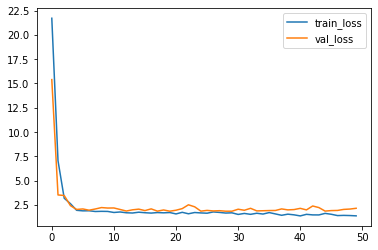

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the model loss, when I used resnet

plt.plot(graph.history['loss'], label='train_loss')
plt.plot(graph.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


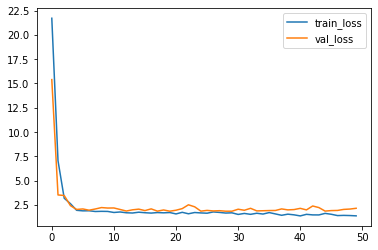

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the model accuracy, when I used resnet

plt.plot(graph.history['loss'], label='train_loss')
plt.plot(graph.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')

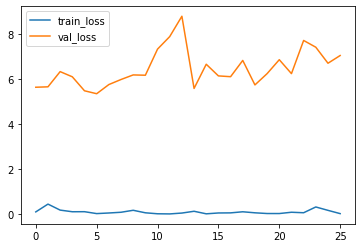

<Figure size 432x288 with 0 Axes>

In [34]:
# plot the model loss, when I used Vgg16

plt.plot(graph_1.history['loss'], label='train_loss')
plt.plot(graph_1.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

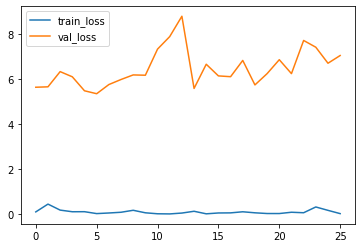

<Figure size 432x288 with 0 Axes>

In [35]:
# plot the model accuracy, when I used Vgg16

plt.plot(graph_1.history['loss'], label='train_loss')
plt.plot(graph_1.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')

In [38]:
# saving the model

from tensorflow.keras.models import load_model

model.save('model.vgg16.h5')

In [39]:
y_pred=model.predict(test_set)

In [40]:
# it predict 6 classes

y_pred

array([[2.44000194e-06, 4.87955674e-07, 3.63298909e-06, 3.91859885e-07,
        9.99936819e-01, 5.62801906e-05],
       [7.74790795e-14, 2.14612792e-13, 1.14588099e-14, 1.83359909e-16,
        9.19534739e-13, 1.00000000e+00],
       [6.39599108e-04, 8.63487912e-07, 9.97881353e-01, 1.80639108e-05,
        1.45629561e-03, 3.77994661e-06],
       [6.75382689e-05, 8.55745003e-03, 3.93135488e-01, 8.11215956e-04,
        2.26315379e-01, 3.71112972e-01],
       [3.17412560e-06, 4.08128972e-06, 1.13198371e-03, 1.97793710e-08,
        6.15632045e-04, 9.98245120e-01],
       [2.37864588e-04, 1.57371585e-06, 1.08401150e-01, 3.74101619e-05,
        8.91187131e-01, 1.34882968e-04],
       [7.20678363e-04, 8.80495086e-02, 1.34820104e-01, 7.69763887e-01,
        2.67544459e-03, 3.97036690e-03],
       [3.11435055e-04, 6.14109874e-11, 9.99511003e-01, 8.46420001e-09,
        1.77568843e-04, 1.01482094e-08],
       [4.42136750e-02, 1.84052809e-08, 4.70177984e-05, 1.58505848e-08,
        9.55436587e-01, 

In [42]:
import numpy as np
y_pred=np.argmax(y_pred, axis=1)

In [43]:
y_pred

array([4, 5, 2, 2, 5, 4, 3, 2, 4, 3, 1, 1, 5, 2, 1, 4, 0, 1, 1, 0, 5, 2,
       0, 2, 4, 4, 1, 3, 0, 5, 0, 1, 5, 0, 2, 3, 5, 4, 3, 3, 0, 3, 5, 2,
       5, 4, 1, 1, 5, 5, 5, 2, 4, 2, 4, 5, 4, 3, 3, 2, 4, 0, 3, 3, 3, 2,
       5, 5, 0, 0, 2, 2, 5, 4, 4, 2, 1, 1, 4, 0, 3, 2, 4, 1, 0, 2, 5, 1,
       5, 1, 5, 2, 5, 5, 5, 2, 5, 2, 5, 5, 4, 0, 5, 4, 2, 1, 5, 1, 4, 1,
       4, 5, 0, 2, 5, 0, 0, 4, 0, 5, 2, 4, 0, 1, 1, 4, 3, 1, 2, 3, 5, 2,
       0, 3, 0, 5, 2, 2, 1, 0, 5, 2, 0, 5, 2, 2, 0, 3, 1, 2])

In [44]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [45]:
model=load_model('model.vgg16.h5')

In [48]:
img=image.load_img('/content/images (25).jpg',target_size=(250,250))

In [50]:
image

<module 'tensorflow.keras.preprocessing.image' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/preprocessing/image/__init__.py'>

In [63]:
# converting imageinto image array

x=image.img_to_array(img)
x

array([[[ 56.,  37.,  23.],
        [ 56.,  37.,  23.],
        [ 57.,  38.,  24.],
        ...,
        [ 98.,  63.,  44.],
        [ 99.,  61.,  38.],
        [101.,  61.,  36.]],

       [[ 56.,  37.,  23.],
        [ 56.,  37.,  23.],
        [ 57.,  38.,  24.],
        ...,
        [ 98.,  63.,  44.],
        [ 99.,  61.,  38.],
        [101.,  61.,  36.]],

       [[ 57.,  38.,  24.],
        [ 57.,  38.,  24.],
        [ 57.,  38.,  24.],
        ...,
        [ 98.,  63.,  44.],
        [100.,  62.,  39.],
        [102.,  62.,  37.]],

       ...,

       [[ 47.,  28.,  13.],
        [ 47.,  28.,  13.],
        [ 48.,  29.,  14.],
        ...,
        [ 72.,  41.,  20.],
        [ 71.,  40.,  19.],
        [ 71.,  40.,  19.]],

       [[ 47.,  28.,  13.],
        [ 47.,  28.,  13.],
        [ 47.,  28.,  13.],
        ...,
        [ 71.,  40.,  19.],
        [ 70.,  39.,  18.],
        [ 70.,  39.,  18.]],

       [[ 47.,  28.,  13.],
        [ 47.,  28.,  13.],
        [ 47.,  

In [64]:
x.shape

(250, 250, 3)

In [55]:
# rescaleour test data

x=x/255

In [62]:
x.shape

(1, 1, 250, 250, 3)

In [65]:
x=np.expand_dims(x,axis=0)
# here  i am  using vgg16 preprocessing

img_data=preprocess_input(x)
img_data.shape

(1, 250, 250, 3)

In [66]:
mobile=np.argmax(model.predict(img_data),axis=1)

In [69]:
glob('/content/test/*')

['/content/test/xiomi',
 '/content/test/vivo',
 '/content/test/one plus',
 '/content/test/samsung',
 '/content/test/iphone',
 '/content/test/oppo']

In [67]:
mobile

array([2])